# Load the Data

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [432]:
# create a list of all the texts
texts = []
with open('sts2016-english-with-gs-v1.0/STS2016.input.answer-answer.txt', 'r') as f:
    for line in f:
        elements = line.strip().split('\t')
        texts.append(elements[0].replace('\n', ''))
        texts.append(elements[1])

In [433]:
for text in texts:
    print(text)

Tasting it is the only reliable way.
The way you have it is fine.
I think it probably depends on your money.
It depends on your country.
You need to read a lot to know what you like and what you don't.
You don't have to know.
Obviously, the best book for you depends a lot on what you are looking for.
The answer will depend of course on what you're looking for in a vacation.
I've had this same problem.
I had the same problem as you.
If you are not sure how to do it, don't do it at all.
Also, if you die, you don't have to repay, don't know if it helps.
It is more deciding what you should do and what you should get others to do.
What can you do and what should you do to grow more?
You need to add this to your resume because it is the only position you have had.
You may want it, but the process given to you is what you have to work within.
I remained under the banyan tree, exhausted by my daily ritual of dragooning the men every two hours. 
I remained under the banyan tree, exhausted by my

# Create Shingles for each text

In [434]:
shingles_per_text = []
k = 3
for text in texts:
    shingles_per_text.append(set([text[i:i + k] for i in range(len(text) - k + 1)]))

print(shingles_per_text[0])

{'the', 'lia', 'ly ', ' re', 'way', 'e o', 'nly', 'tin', ' wa', 't i', 'eli', 'rel', ' on', 'g i', 'Tas', 'y r', 'abl', 'he ', 'ble', 's t', 'sti', 'ing', ' it', 'iab', 'is ', ' is', 'le ', 'ng ', 'it ', 'e w', 'ay.', 'onl', ' th', 'ast'}


# Create Bit-Vector for each text (Matrix of Bit-Vectors [f. 51])

In [435]:
# create a set of all shingles
all_shingles_of_file = set()
for shingle_of_text in shingles_per_text:
    all_shingles_of_file.update(shingle_of_text)
print(all_shingles_of_file)

{'gen', 'tly', '"no', 'tst', 'nom', 'oci', 'itl', 'ow ', '-up', 'Try', 'rm ', 'XXX', ' Ph', 'ul ', 'ng?', 'Whi', 'yse', 'rni', 'tis', 'ess', 'n.a', 'efu', 'Mak', 'ar ', 'xer', 'l i', 'oev', 'r/p', 'ms,', 'uge', 'de ', 'std', 'h g', 'vie', 'sop', 'tes', 'ngs', ' Go', 'r q', ' SA', 'k l', 'fid', '-ar', 'erf', 'me,', 'nfi', 'dep', 'iso', 'chn', 'h t', 'pti', 'lig', 'Unf', 'bui', 'ft.', 'd H', 'r 4', 'cif', 'xha', 'wl ', 'te?', 'yho', 'o n', 'h, ', 'amm', ' "c', 'be,', 'lk ', 'm y', 't T', ' Y-', 'pos', 'wil', 'ar.', 'OU ', 'ne-', 'I h', 'tax', ' we', 'tso', '"do', 'ss,', 'goi', ' nu', 'xpl', 'ld.', 'egg', "u'r", 'rms', 'ure', 'irc', ' ar', 'zer', 'k q', 'RS.', 'A f', 'go ', '0".', 'oax', '-ag', 'ilz', 'pul', 'lli', 'tha', 'h l', 'h f', 'g."', 'k n', 'tig', ' tr', 'im ', 'g u', 'bre', 't G', ' Ou', 'ABL', 'nLi', 'amo', 't o', 'ana', 'n t', 'mys', 'mic', 'ubl', 'y f', 'Did', 'nyw', '012', 'le-', 'G. ', 'unc', 'x r', 'sex', 'n -', 'mmé', ' st', 'm, ', 'oly', 'epo', 'lui', 'sh,', 'pH ', 's? '

In [436]:
# create Bit-Vector for each text -> this will yield the matrix of the bit-vectors
bit_Matrix = []
for shingle_of_text in shingles_per_text:
    bit_vector_for_text = []
    
    for shingle_of_file in all_shingles_of_file:
        
        if shingle_of_file in shingle_of_text:
            bit_vector_for_text.append(1)
        else:
            bit_vector_for_text.append(0)
            
    bit_Matrix.append(bit_vector_for_text)

In [437]:
# nur um zz zeigen, dass es funktioniert
for vector in bit_Matrix:
    print(vector[0:16])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0

# Calculate MinHash-Signature for each text

# Create Hash-Functions (random permutations)

In [438]:
# generate n hash functions (random permutations)
n = 250
hash_functions = []
for h in range(n):
    perm = np.random.permutation(len(all_shingles_of_file))
    hash_functions.append(perm)

print(hash_functions[0])

[ 817  537 3273 ... 3109 2570  187]


# Calculate MinHash-Signature for each text (MinHash Matrix)

In [439]:
signature_matrix = []
for bit_vector in bit_Matrix:
    signature_vector = []
    for hash_function in hash_functions:
        # find the first 1 in the bit vector
        # we don't permutate the original bit vector, we instead use the hash function and check the bit vector at the permutated index
        for col_index in range(len(bit_vector)):
            if bit_vector[hash_function[col_index]] == 1:
                signature_vector.append(hash_function[col_index])
                break
    signature_matrix.append(signature_vector)

In [440]:
for signature_vector in signature_matrix:
    print(signature_vector[0:8])

[3950, 2008, 4198, 1882, 3990, 3697, 3843, 3990]
[283, 2143, 4198, 296, 3720, 3697, 2419, 3697]
[3689, 779, 1433, 1103, 3990, 3639, 816, 3990]
[3575, 1103, 2056, 1103, 1382, 3639, 506, 46]
[1654, 821, 2230, 1566, 3199, 2230, 3966, 2651]
[4054, 296, 3904, 296, 237, 3075, 3966, 1233]
[3794, 821, 2056, 3216, 4177, 3700, 3929, 4086]
[3226, 4289, 1037, 3216, 3029, 3700, 3929, 2224]
[3121, 4063, 2834, 296, 2926, 1899, 3385, 1074]
[3121, 3121, 2834, 175, 1382, 1899, 3385, 1074]
[601, 524, 1207, 1336, 1382, 215, 3163, 1193]
[4143, 1838, 1597, 296, 2287, 3075, 1847, 2253]
[2964, 1607, 273, 1882, 3029, 3907, 3488, 2224]
[4355, 554, 3852, 1300, 3029, 3639, 3929, 2461]
[3121, 1103, 2350, 296, 3990, 3639, 2363, 3990]
[4160, 19, 1433, 296, 4177, 2016, 2419, 3872]
[1058, 3526, 1037, 1761, 3990, 2338, 3679, 3990]
[1058, 3526, 1037, 1761, 3990, 2338, 1917, 3990]
[537, 537, 1037, 3160, 1111, 3221, 1111, 2350]
[3867, 3731, 1037, 3731, 4183, 3221, 1022, 3950]
[283, 2143, 4198, 296, 3720, 3697, 2419, 3697]

### Compare the MinHash-Signatures similarity to the Jaccard-Similarity

In [441]:

def find_similarities(index=0):
    sig_1 = signature_matrix[index]
    bit_v_1 = bit_Matrix[index]
    sig_sims = []
    bit_sims = []
    
    for col in signature_matrix:
        sig_sims.append(np.sum(np.array(sig_1) == np.array(col)) / len(signature_matrix[0]))
    
    for col in bit_Matrix:
        intersection = np.sum(np.array(bit_v_1) & np.array(col))
        union = np.sum(np.array(bit_v_1) | np.array(col))
        bit_sims.append(intersection / union)
        
    
    return pd.DataFrame({'Jaccard-Similarity': bit_sims, 'MinHash-Similarity': sig_sims, 'Text': texts, 'difference': np.array(sig_sims) - np.array(bit_sims)})

In [442]:
similarities = find_similarities(166)
similarities

,Jaccard-Similarity,MinHash-Similarity,Text,difference
0,0.030303,0.028,Tasting it is the only reliable way.,-0.002303
1,0.090909,0.068,The way you have it is fine.,-0.022909
2,0.193548,0.212,I think it probably depends on your money.,0.018452
3,0.255319,0.296,It depends on your country.,0.040681
4,0.075949,0.060,You need to read a lot to know what you like a...,-0.015949
...,...,...,...,...
3137,0.012987,0.020,I have had the same issue last couple of years.,0.007013
3138,0.038462,0.052,I don't think it makes any tremendous difference.,0.013538
3139,0.052632,0.060,I don't think that there's any.,0.007368
3140,0.056604,0.052,"If you haven't, you should.",-0.004604


# find possible pairs of similar texts with LSH 

# Create Bands and set Hyperparameters

In [443]:
number_bands = 5
number_rows_per_band = len(hash_functions) / number_bands
number_of_buckets = 5000

# sort bands into buckets

In [444]:
buckets = [[] for i in range(number_of_buckets)]
for col_index in range(len(signature_matrix)):
    for band_num in range(number_bands):
        # get the signature vector for the current text
        signature_vector = signature_matrix[col_index]
        # get the current band
        start_index = int(band_num * number_rows_per_band)
        end_index = int((band_num + 1) * number_rows_per_band)
        band = signature_vector[start_index:end_index]
        # calculate the hash value for the band
        hash_value = hash(tuple(band)) % number_of_buckets
        # add the text to the bucket
        buckets[hash_value].append(col_index)
        

In [445]:
for bucket in buckets:
    if len(bucket) > 1:
        print(bucket)

[981, 1483, 1553, 2267, 2359, 2690]
[1069, 1693]
[446, 1556, 1912, 2819]
[1673, 2576, 2693]
[249, 2369]
[575, 2090]
[1536, 1536]
[1262, 1362]
[1610, 2087]
[63, 2457]
[186, 248, 292, 882, 1004, 1284, 1986, 2608, 2738]
[36, 38, 308, 337, 410, 721, 750, 1076, 1098, 1148, 1778, 1850, 1932, 2140, 2250, 2317, 2322, 2570, 2607, 2638, 2696, 2816, 2834, 2848]
[317, 1408]
[484, 1122, 1733, 2842]
[90, 397, 418, 521, 923, 1123, 1837, 2228, 2519]
[1235, 2432]
[2146, 2847]
[919, 1764]
[219, 1814, 2633, 2758, 2903]
[411, 779, 1202]
[461, 495, 725, 2867]
[69, 227, 485, 838, 1387, 2644, 3085]
[62, 265, 444, 494, 588, 592, 636, 668, 704, 812, 826, 980, 990, 1020, 1040, 1101, 1274, 1370, 1413, 1480, 1528, 1558, 1634, 1742, 1772, 1780, 1944, 2374, 2383, 2392, 2536, 2626, 2656, 2702, 2728, 2792, 2802, 3058, 3069]
[829, 1536, 1783, 2037, 2081, 2297]
[591, 2767]
[1019, 1328, 1367, 1759, 2156, 2499]
[1828, 2945]
[152, 3037]
[1369, 2469]
[131, 299, 1945]
[209, 2782]
[1118, 1144, 1799, 2426, 2730]
[49, 2419, 25

### Show histogram of #entries per bucket

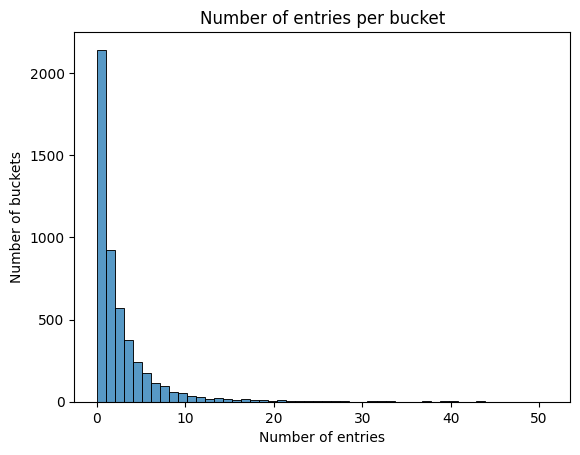

In [446]:
sns.histplot([len(bucket) for bucket in buckets], bins=50)
plt.title('Number of entries per bucket')
plt.xlabel('Number of entries')
plt.ylabel('Number of buckets')
plt.show()

# find candidate pairs

In [447]:
candidate_pairs = []
for bucket in buckets:
    # find all buckets with more than one entry
    if len(bucket) > 1:
        # create all possible pairs of the bucket
        for i in range(len(bucket)):
            for j in range(i + 1, len(bucket)):
                candidate_pairs.append((bucket[i], bucket[j]))
print(candidate_pairs[0:10])

[(981, 1483), (981, 1553), (981, 2267), (981, 2359), (981, 2690), (1483, 1553), (1483, 2267), (1483, 2359), (1483, 2690), (1553, 2267)]


# get jaccard similarity for candidate pairs

In [448]:
jac_sims = []
for pair in candidate_pairs:
    jac_sims.append(np.sum(np.array(bit_Matrix[pair[0]]) & np.array(bit_Matrix[pair[1]])) / np.sum(np.array(bit_Matrix[pair[0]]) | np.array(bit_Matrix[pair[1]])))

### create dataframe with jaccard similarities and text pairs

In [454]:
candidate_pairs_df = pd.DataFrame({'Jaccard-Similarity': jac_sims, 'id1': [pair[0] for pair in candidate_pairs], 'Text 1': [texts[pair[0]] for pair in candidate_pairs], 'id2': [pair[1] for pair in candidate_pairs], 'Text 2': [texts[pair[1]] for pair in candidate_pairs]})

In [455]:
# filter all cells, where id1 == id2
candidate_pairs_df = candidate_pairs_df[candidate_pairs_df['id1'] != candidate_pairs_df['id2']]
print(f'Number of possible pairs: {len(texts) * (len(texts) - 1) / 2}')
print(f'Number of found pairs (sim=1): {len(candidate_pairs_df[candidate_pairs_df["Jaccard-Similarity"] > 0.8])}')

# remove jac_sims == 1
candidate_pairs_df = candidate_pairs_df[candidate_pairs_df['Jaccard-Similarity'] != 1]

print(f'Number of candidate pairs: {len(candidate_pairs_df)}')

Number of possible pairs: 4934511.0
Number of found pairs (sim=1): 44280
Number of candidate pairs: 24043


In [451]:
candidate_pairs_df

,Jaccard-Similarity,id1,Text 1,id2,Text 2
0,0.179487,981,It depends on what you want to be able to do.,1483,The HarpAndDragon website should be able to he...
2,0.000000,981,It depends on what you want to be able to do.,2267,I had the same situation.
3,0.086420,981,It depends on what you want to be able to do.,2359,There are a few things you can do to thicken y...
4,0.063291,981,It depends on what you want to be able to do.,2690,I'd also tie a rope to the other end of the br...
5,0.179487,1483,The HarpAndDragon website should be able to he...,1553,It depends on what you want to be able to do.
...,...,...,...,...,...
68300,0.057143,335,Is it that you can't or that you don't want to...,2669,The answer to both questions is: Yes.
68301,0.057143,335,Is it that you can't or that you don't want to...,3112,The answer to both questions is: Yes.
68330,0.014286,681,The word you're looking for is Atonal,1426,You will want to clean the area first.
68331,0.014085,681,The word you're looking for is Atonal,1427,You will also want to remove the seeds.


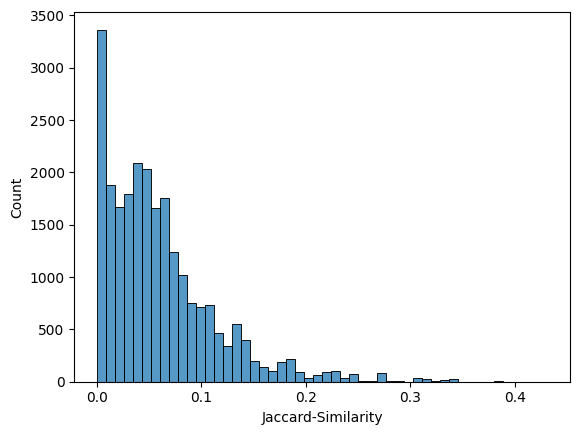

In [452]:
sns.histplot(candidate_pairs_df['Jaccard-Similarity'], bins=50)
plt.show()